

#  WeRateDogs Project_Wrangling and Analyzing Data from Twitter 


* <font color=#FF7E00> *By Moh A T Elgaser*</font>

* <font color=#FF7E00> *Date: Feb  28th, 2018*</font>


# Data Wrangling

## Introduction
>The requirement of current project is to wrangle the tweet archive of **Twitter user** __[@dog_rates](https://twitter.com/dog_rates)__ Twitter data, also known as __[WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs)__, to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations. In this project, Tweepy is used to query Twitter's API for additional data beyond the data included in the WeRateDogs Twitter archive.



>1. The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

>1. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

>1. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.



Before we can begin, we have to import the python libraries necessary for wrangling and analyzing this data.

In [82]:
import pandas as pd
import numpy as np 
import tweepy
import requests
import json
import os
import re
import matplotlib.pyplot as plt
import datetime


## Gather
Data sources came from three ways shown as below:

- 1 The WeRateDogs Twitter archive is download  manually by clicking the following link: __[twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)__.


- 2 The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv.


- 3 Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive,for each tweet's JSON data using Python's __[Tweepy](http://www.tweepy.org/)__ library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.or we can use tweet-json.txt downloaded from Udacity's servers

First, importing the file given to us from the beginning into our notebook. This file was a tweet archive originally given to Udacity from @WeRateDogs themselves! The file has been tinkered with a little bit. But will definitely need some cleaning.


### Twitter Archive (Local File)

In [2]:
# Importing the twitter-archive-enhanced.csv file into a DataFrame.
# This file is provided by Udacity and it is located in our project folder.
df = pd.read_csv('twitter-archive-enhanced.csv')

In [12]:
# make acopy of 
tweet_archive=df.copy()

In [13]:
tweet_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


Moving onward to downloading the files programmatically. This next file is the result of a neural network dog breed classifier.

# image_predictions (Local File)

In [14]:
#Download image_predictions file
file_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(file_url)
with open(os.path.join(os.getcwd(), file_url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [15]:
#after running the above code chunk, I doubled-checked to see if the file saved correctly. (It did!) Now importing!

In [16]:
df1 = pd.read_csv('image-predictions.tsv', sep='\t')

In [17]:
doggo_pred=df1.copy()

Next up, querying the twitter API to get each tweets JSON data, we will then save that JSON data to a text file. _This cell only needs to be ran ONCE. After that initial go, the JSON data is saved to a text file._

In [18]:
additional_tweet_data= pd.read_json('tweet-json.txt', lines = True,encoding='utf-8')

In the cell below, we read the JSON data from the txt file, and extract tweet id, favorite count, and retweet count and put that into its own dataframe.

### Assessing the data

In [19]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
tweet_archive.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
274,840698636975636481,8.406983e+17,8.405479e+17,2017-03-11 22:59:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@0_kelvin_0 &gt;10/10 is reserved for puppos s...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
1359,703356393781329922,NaN,NaN,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Socks. That water pup w the super legs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703356393...,9,10,Socks,None,None,None,None
871,761599872357261312,NaN,NaN,2016-08-05 16:28:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Sephie. According to this picture, she...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/761599872...,11,10,Sephie,None,None,None,None
590,799297110730567681,NaN,NaN,2016-11-17 17:04:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrey. He's quite the jokester. Take...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799297110...,11,10,Jeffrey,None,None,None,None
1081,738885046782832640,NaN,NaN,2016-06-04 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charles. He's a Nova Scotian Towel Pou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738885046...,11,10,Charles,None,None,None,None
545,805826884734976000,NaN,NaN,2016-12-05 17:31:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He is not a fan of the pupporazz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805826884...,12,10,Duke,None,None,None,None
2040,671544874165002241,NaN,NaN,2015-12-01 04:22:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Interesting dog here. Very large. Purple. Mani...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671544874...,6,10,None,None,None,None,None


In [22]:
tweet_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
print(tweet_archive[tweet_archive.tweet_id.isnull()])
print(tweet_archive[tweet_archive.tweet_id.duplicated()])

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []
Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []


In [24]:
print(tweet_archive[tweet_archive.rating_numerator == 0])

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
315   835152434251116546                    NaN                  NaN   
1016  746906459439529985           7.468859e+17         4.196984e+09   

                      timestamp  \
315   2017-02-24 15:40:31 +0000   
1016  2016-06-26 03:22:31 +0000   

                                                 source  \
315   <a href="http://twitter.com/download/iphone" r...   
1016  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
315   When you're so blinded by your systematic plag...                  NaN   
1016  PUPDATE: can't see any. Even if I could, I cou...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
315                        NaN                        NaN   
1016                       NaN                        NaN   

                                          expanded_urls  rating_numerator 

In [25]:
print(tweet_archive.name.value_counts())

None           745
a               55
Charlie         12
Lucy            11
Oliver          11
Cooper          11
Penny           10
Lola            10
Tucker          10
Bo               9
Winston          9
the              8
Sadie            8
an               7
Daisy            7
Buddy            7
Bailey           7
Toby             7
Jax              6
Stanley          6
Rusty            6
Milo             6
Koda             6
Dave             6
Scout            6
Bella            6
Oscar            6
Jack             6
Leo              6
Chester          5
              ... 
Jerome           1
Jo               1
Ebby             1
Jimbo            1
Rufio            1
Rodman           1
Flash            1
Venti            1
Shakespeare      1
Zeus             1
Lacy             1
Harrison         1
Ike              1
Tanner           1
Jed              1
Zeek             1
Aldrick          1
Wesley           1
Pip              1
Siba             1
Scott            1
light       

In [26]:
doggo_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [27]:
doggo_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
additional_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [29]:
additional_tweet_data.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


#### Data Tidiness Issues

- The additional_tweet_data dataframe, the tweet_archive dataframe, and the doggo_pred dataframe should all be one dataframe. 

- The doggo, pupper, puppo, and floofer columns are possible values, and should all in one column.

#### Data Quality Issues

- In the tweet_archive dataframe, the following columns are of the wrong data type: tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and timestamp.

- In the additional_tweet_data dataframe, and doggo_pred tweet_id is also of the wrong data type. 

- There are some entries that are not pictures of dogs, typically rated less than 10. 

- There are a few tweets that have been deleted. I.e missing API data 

- We are missing data for the dog breed predictions.

- Some names in the name columns can't possibly be dog names. (a, the, an, this...)

- We only want original ratings. So we don't want tweets replying to another tweet. 


For right now, we are going to move on and work on these issues and reassess the data later.

### Cleaning the Data

In [31]:
#creating copies of the dataframes to clean. 
tweet_archive_clean = tweet_archive.copy()
additional_tweet_data_clean = additional_tweet_data.copy()
doggo_pred_clean = doggo_pred.copy()
doggo_pred_clean 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [32]:
additional_tweet_data_clean['tweet_id']=additional_tweet_data_clean['id']


#### Tidiness Tasks

##### Define

1) Melt the doggo, pupper, puppo, and floofer columns into one column. 

##### Code

In [33]:
#First we will melt the tweet_archive dataframe. 
#This will be easier to do now than when all three dataframes are joined

#We want to create a list of our original tweet ids, with no duplicates.
tweet_ids = tweet_archive_clean.tweet_id.tolist()

#Melting the doggo, pupper, puppo, and floofer columns
tweet_archive_clean =pd.melt(tweet_archive_clean, id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                       'retweeted_status_user_id', 'timestamp', 'source', 'text', 'retweeted_status_timestamp',
                                       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'], 
        var_name = 'type_toberemoved', value_name = 'type')
tweet_archive_clean = tweet_archive_clean.drop('type_toberemoved', axis =1)

In [34]:
for idx, twtid in enumerate(tweet_ids):
    dog_tweets = tweet_archive_clean[tweet_archive_clean.tweet_id == twtid]
    
    
#if a tweet has any type value(s) that is not 'None', we will, set the first one to whatever value(s) it is
# and drop the other three rows.
    if dog_tweets.type.values.tolist()[0] != 'None':
        doge_type = dog_tweets[dog_tweets.type != 'None'].type.values.tolist()
        tweet_archive_clean.loc[idx, 'type'] = ','.join(doge_type)
        tweet_archive_clean = tweet_archive_clean.drop(labels = dog_tweets.index.values.tolist()[1:], axis = 0)
        continue
        
    if dog_tweets.type.values.tolist()[1] != 'None':
        doge_type = dog_tweets[dog_tweets.type != 'None'].type.values.tolist()
        tweet_archive_clean.loc[idx, 'type'] = ','.join(doge_type)
        tweet_archive_clean = tweet_archive_clean.drop(labels = dog_tweets.index.values.tolist()[1:], axis = 0)
        continue
        
    if dog_tweets.type.values.tolist()[2] != 'None':
        doge_type = dog_tweets[dog_tweets.type != 'None'].type.values.tolist()
        tweet_archive_clean.loc[idx, 'type'] = ','.join(doge_type)
        tweet_archive_clean = tweet_archive_clean.drop(labels = dog_tweets.index.values.tolist()[1:], axis = 0)
        continue
        
    if dog_tweets.type.values.tolist()[3] != 'None':
        doge_type = dog_tweets[dog_tweets.type != 'None'].type.values.tolist()
        tweet_archive_clean.loc[idx, 'type'] = ','.join(doge_type)
        tweet_archive_clean = tweet_archive_clean.drop(labels = dog_tweets.index.values.tolist()[1:], axis = 0)
        continue
        
#if a tweet has type value 'None' for all four types, we will just drop the last three rows
    else: 
        tweet_archive_clean = tweet_archive_clean.drop(labels = dog_tweets.index.values.tolist()[1:], axis = 0)
       

##### Test

In [35]:
print(tweet_archive_clean.type.value_counts())
vc_type=tweet_archive_clean.type.value_counts()

None             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: type, dtype: int64


##### Define

2) Merge the additional_tweet_data dataframe, the tweet_archive dataframe, and the doggo_pred dataframe. After completing this task, we will only be working with the tweet_archive_dataframe.

##### Code

In [36]:
#Merging tweet_archive & additional_tweet_data from api.
#We will set the how parameter to 'inner'; that way we only deal with tweets that are in both tables.

tweet_archive_clean = pd.merge(tweet_archive_clean, additional_tweet_data_clean, on = ['tweet_id'], how = 'inner')

In [37]:
#Merging 'inner' again for same reason.
tweet_archive_clean = pd.merge(tweet_archive_clean, doggo_pred, on ='tweet_id', how = 'inner')

##### Test

In [38]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 56 columns):
tweet_id                         2073 non-null int64
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
retweeted_status_id              79 non-null float64
retweeted_status_user_id         79 non-null float64
timestamp                        2073 non-null object
source_x                         2073 non-null object
text                             2073 non-null object
retweeted_status_timestamp       79 non-null object
expanded_urls                    2073 non-null object
rating_numerator                 2073 non-null int64
rating_denominator               2073 non-null int64
name                             2073 non-null object
type                             2073 non-null object
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2073 non-

#### Quality Tasks

1) We only want original ratings. So we don't want tweets replying to another tweet, or retweeted tweets.

2) In the tweet_archive dataframe, the following columns are of the wrong data type: tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and timestamp.

3) There are a few tweets that have been deleted. I.e missing API data 

4) We are missing data for the dog breed predictions.

5) Some names in the name columns can't possibly be dog names. (a, the, an, this...) 







 






##### Define

1) Subset our dataframe so that we only get tweets that were officially rated and tweeted by @dog_rates. Therefore tweets that are not replying to another tweet and are not retweets from another account. A lot of the tweets that are in reply to another tweet, are sometimes upgraded ratings, we will still discard these because the advisor advised it would be too challenging. _Meaning we only want tweets that do not have a in_reply_to_status_id, or a retweeted_status_id. We will also drop the columns associated with replys and retweets._ Some screenshots of example tweets are show below.

In [39]:
tweet_archive_clean

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,retweeted_status_id,retweeted_status_user_id,timestamp,source_x,text,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,https://twitter.com/dog_rates/status/891087950...,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,https://twitter.com/dog_rates/status/890729181...,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,https://twitter.com/dog_rates/status/890609185...,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,https://twitter.com/dog_rates/status/890240255...,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [40]:
tweet_archive_clean[~tweet_archive_clean.in_reply_to_status_id_x.isnull()].tweet_id.head()

123    863079547188785154
152    856526610513747968
201    844979544864018432
457    802265048156610565
832    746906459439529985
Name: tweet_id, dtype: int64

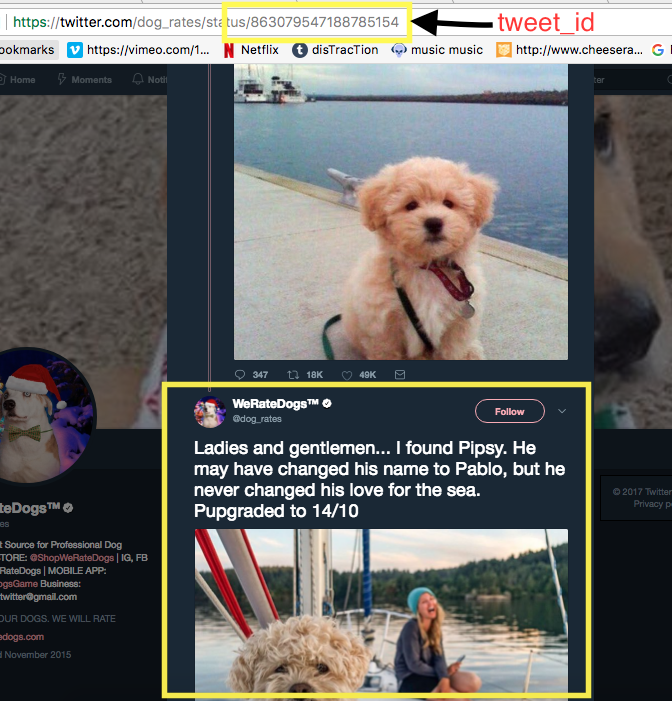
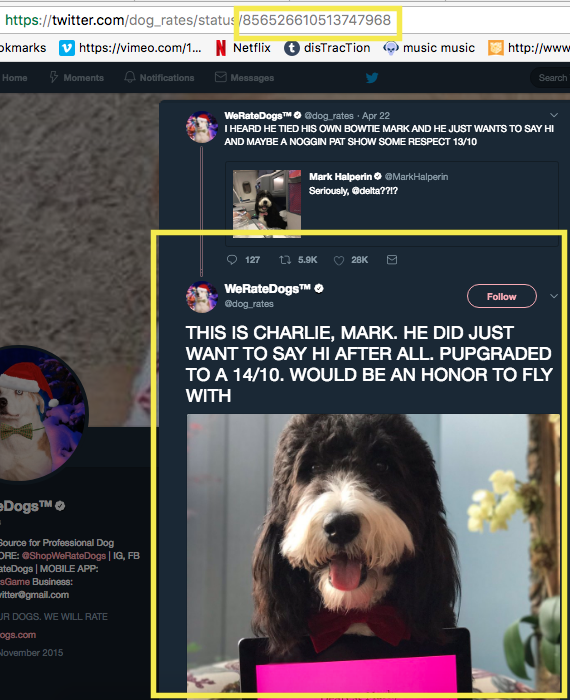
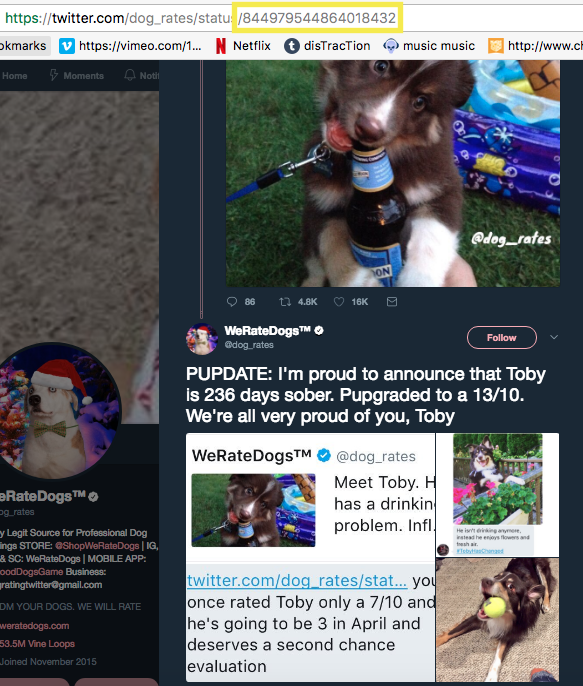


##### Code

In [41]:
tweet_archive_clean

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,retweeted_status_id,retweeted_status_user_id,timestamp,source_x,text,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,https://twitter.com/dog_rates/status/891087950...,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,https://twitter.com/dog_rates/status/890729181...,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,https://twitter.com/dog_rates/status/890609185...,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,https://twitter.com/dog_rates/status/890240255...,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [42]:
#dropping reply tweet
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.in_reply_to_status_id_x.isnull()]

#dropping retweeted tweets
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean.retweeted_status_id.isnull()]

#dropping columns related to tweets that were retweeted or reply tweets
tweet_archive_clean = tweet_archive_clean.drop(labels = ['in_reply_to_status_id_x', 'in_reply_to_user_id_x', 'retweeted_status_id',
                           'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1 )

##### Test

In [43]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 51 columns):
tweet_id                         1971 non-null int64
timestamp                        1971 non-null object
source_x                         1971 non-null object
text                             1971 non-null object
expanded_urls                    1971 non-null object
rating_numerator                 1971 non-null int64
rating_denominator               1971 non-null int64
name                             1971 non-null object
type                             1971 non-null object
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1971 non-null datetime64[ns]
display_text_range               1971 non-null object
entities                         1971 non-null object
extended_entities                1971 non-null object
favorite_count                   1971 non-null int64
favorited                    

##### Define

2) Convert the tweet_id to string. Convert timestamp to datetime. The in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id columns do not need to be converted, because we dropped those columns. 

In [44]:
#converting tweet_id to string
tweet_archive_clean.tweet_id = tweet_archive_clean.tweet_id.astype('str')

#converting timestamp to datetime
tweet_archive_clean.timestamp = pd.to_datetime(tweet_archive_clean.timestamp)

##### Test

In [45]:
tweet_archive_clean.info()
tweet_archive_clean.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 51 columns):
tweet_id                         1971 non-null object
timestamp                        1971 non-null datetime64[ns]
source_x                         1971 non-null object
text                             1971 non-null object
expanded_urls                    1971 non-null object
rating_numerator                 1971 non-null int64
rating_denominator               1971 non-null int64
name                             1971 non-null object
type                             1971 non-null object
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1971 non-null datetime64[ns]
display_text_range               1971 non-null object
entities                         1971 non-null object
extended_entities                1971 non-null object
favorite_count                   1971 non-null int64
favorited           

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,type,contributors,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
403,813081950185472002,2016-12-25 18:00:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Baron. He's officially festive as h*ck...,https://twitter.com/dog_rates/status/813081950...,11,10,Baron,None,NaN,...,2,Doberman,0.909951,True,kelpie,0.042649,True,miniature_pinscher,0.023004,True
793,750117059602808832,2016-07-05 00:00:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Calvin. He just loves America so much....,https://twitter.com/dog_rates/status/750117059...,10,10,Calvin,None,NaN,...,2,Shih-Tzu,0.814405,True,Lhasa,0.175220,True,Pekinese,0.008072,True
335,822244816520155136,2017-01-20 00:50:15,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please don't send pics of m...,https://twitter.com/dog_rates/status/822244816...,11,10,None,None,NaN,...,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
928,730211855403241472,2016-05-11 01:44:07,"<a href=""http://twitter.com/download/iphone"" r...",This is Ziva. She doesn't know how her collar ...,https://twitter.com/dog_rates/status/730211855...,11,10,Ziva,None,NaN,...,1,pug,0.341663,True,Norwegian_elkhound,0.171222,True,German_shepherd,0.124687,True
1834,670434127938719744,2015-11-28 02:48:46,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hank and Sully. Hank is very proud of the...,https://twitter.com/dog_rates/status/670434127...,11,10,Hank,None,NaN,...,1,jack-o'-lantern,0.919140,False,Chesapeake_Bay_retriever,0.027351,True,Labrador_retriever,0.020081,True


##### Define

3) We have already deal with the deleted tweets, through the way of the merging of the dataframes. We only took the tweets that the twitter api was able to return. We kept a list of the tweets that weren't able to be returned. We will make sure that these tweets that are in our deleted_tweets list are not still in our dataframe. 

__This cell will return an error if you get the api data from the text file, as opposed to accessing the API and then saving the text file.__

##### Test

In [83]:
for tweet in deleted_tweets:
    if str(tweet) in tweet_archive_clean:
        print("Oops! Something went wrong.")
print('Done!')

NameError: name 'deleted_tweets' is not defined

##### Define

4) Drop rows that do not have a jpg_url column as tweets without a jpg_url do not contain images. 

_This clears up our issue with missing data for the doggo predictions dataframe. Tweets without predictions do not have images_

##### Code

In [47]:
tweet_archive_clean=tweet_archive_clean[~tweet_archive_clean.jpg_url.isnull()]

##### Test

In [48]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 51 columns):
tweet_id                         1971 non-null object
timestamp                        1971 non-null datetime64[ns]
source_x                         1971 non-null object
text                             1971 non-null object
expanded_urls                    1971 non-null object
rating_numerator                 1971 non-null int64
rating_denominator               1971 non-null int64
name                             1971 non-null object
type                             1971 non-null object
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1971 non-null datetime64[ns]
display_text_range               1971 non-null object
entities                         1971 non-null object
extended_entities                1971 non-null object
favorite_count                   1971 non-null int64
favorited           

##### Define

5) Loop through names that are all lowercase or are 'None', and use a regex expression to extract further extract the name. If their name isn't included in the tweet, their name will be switched to 'None'.

##### Code

In [49]:
#Since we've operated quite a bit we are going to reset our dataframe indexes. Ie, 1971 rows in dataframe 
#so last index will be 1970 and first will be 0. 
tweet_archive_clean.set_index(keys = [list(range(len(tweet_archive_clean.tweet_id)))], inplace = True)

In [50]:
## looping through this enumerate function doesn't work unless we reset the indexes.
wrong_names = []
for idx, name in enumerate(tweet_archive_clean.name):
    # We only want to investigate entries that either:
    #don't have the first letter of the name capitalized, or weren't named
    if name.islower() or name == 'None':
        j = re.compile('(?:named\s|name\sis\s)(\w+)')
        if j.findall(tweet_archive_clean.loc[idx,'text']):
            tweet_archive_clean.loc[idx,'name'] = j.findall(tweet_archive_clean.loc[idx,'text'])[0]
        # if they don't match the above pattern their name will be changed to 'None'
        else:
            tweet_archive_clean.loc[idx,'name'] = 'None'

##### Test

In [51]:
tweet_archive_clean.name.value_counts()

None         593
Charlie       11
Oliver        10
Lucy          10
Cooper        10
Penny          9
Tucker         9
Sadie          8
Winston        8
Daisy          7
Lola           7
Toby           7
Koda           6
Bella          6
Bo             6
Stanley        6
Jax            6
Louis          5
Chester        5
Dave           5
Buddy          5
Zoey           5
Oscar          5
Leo            5
Bailey         5
Scout          5
Milo           5
Rusty          5
Clarence       4
George         4
            ... 
Jersey         1
Nimbus         1
Clybe          1
Snicku         1
Terrenth       1
Aldrick        1
Zeek           1
Harper         1
Tyrone         1
Willy          1
Crawford       1
Spork          1
Thea           1
Sully          1
Chompsky       1
Vinnie         1
Bobble         1
Divine         1
Orion          1
Jed            1
Gin            1
Remy           1
Venti          1
Lacy           1
Pepe           1
Harrison       1
Enchilada      1
Ike           

### Reassessing the data

We are going to take another look at the data and address more issues. 

In [52]:
tweet_archive_clean.info()
tweet_archive_clean.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 51 columns):
tweet_id                         1971 non-null object
timestamp                        1971 non-null datetime64[ns]
source_x                         1971 non-null object
text                             1971 non-null object
expanded_urls                    1971 non-null object
rating_numerator                 1971 non-null int64
rating_denominator               1971 non-null int64
name                             1971 non-null object
type                             1971 non-null object
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1971 non-null datetime64[ns]
display_text_range               1971 non-null object
entities                         1971 non-null object
extended_entities                1971 non-null object
favorite_count                   1971 non-null int64
favorited           

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,type,contributors,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
596,769940425801170949,2016-08-28 16:51:16,"<a href=""http://twitter.com/download/iphone"" r...",This is Klein. These pics were taken a month a...,https://twitter.com/dog_rates/status/769940425...,12,10,Klein,None,NaN,...,1,miniature_pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire_bullterrier,0.030943,True
1910,667138269671505920,2015-11-19 00:32:12,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,NaN,...,1,West_Highland_white_terrier,0.747713,True,Samoyed,0.243629,True,toy_poodle,0.001804,True
580,772152991789019136,2016-09-03 19:23:13,"<a href=""http://twitter.com/download/iphone"" r...",Here's a couple rufferees making sure all the ...,https://twitter.com/dog_rates/status/772152991...,10,10,None,None,NaN,...,2,golden_retriever,0.275318,True,Irish_setter,0.100988,True,vizsla,0.073525,True
197,842846295480000512,2017-03-17 21:13:10,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He's wishing you a very fun a...,https://twitter.com/dog_rates/status/842846295...,13,10,Charlie,None,NaN,...,1,Labrador_retriever,0.461076,True,golden_retriever,0.154946,True,Chihuahua,0.110249,True
1620,672591762242805761,2015-12-04 01:42:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Taz. He boxes leaves. 10/10 https://t....,https://twitter.com/dog_rates/status/672591762...,10,10,Taz,None,NaN,...,1,kuvasz,0.777659,True,Great_Pyrenees,0.112517,True,golden_retriever,0.038351,True


In [89]:
tweet_archive_clean[tweet_archive_clean.type=='None'].text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
7       When you watch your owner call another dog a g...
8       This is Zoey. She doesn't want to be one of th...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
13      This is Ted. He does his best. Sometimes that'...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This is Zeke. He has a new stick. Very proud o...
18      This is Ralphus. He's powering up. Attempting ...
19      This is Gerald. He was just told he didn't get...
20      This i

In [90]:

for t in tweet_archive_clean[tweet_archive_clean.type =='None'].text:
    if 'doggo' in t:
        print(t)
    if 'puppo' in t:
        print(t)
    if 'pupper' in t:
        print(t)
    if 'floofer' in t:
        print(t)

#### Quality issues

6) The following variables are of the wrong data type: type, p1, p1_dog, p2, p2_dog, p3, p3_dog, rating_numerator, rating_denominator.

7) There are some entries that are not pictures of dogs, typically rated less than 10.

8) There are some missing dog types in our dataset.



### Back to cleaning the data

##### Define

6) The following variables need to be switched to category data type: type, p1, p2, and p3. The following variables need to be switched to a boolean data type: p1_dog, p2_dog, p3_dog. The following data types need to be switched to a float data type: rating_numerator, rating_numerator.

##### Code

In [54]:
#Switch type, p1 ,p2, and p3 to category.
tweet_archive_clean.p1 = tweet_archive_clean.p1.astype('category')
tweet_archive_clean.p2 = tweet_archive_clean.p2.astype('category')
tweet_archive_clean.p3 = tweet_archive_clean.p3.astype('category')
tweet_archive_clean.type = tweet_archive_clean.type.astype('category')

#Switch p1_dog, p2_dog, and p3_dog to boolean
tweet_archive_clean.p1_dog = tweet_archive_clean.p1_dog.astype('bool')
tweet_archive_clean.p2_dog = tweet_archive_clean.p2_dog.astype('bool')
tweet_archive_clean.p3_dog = tweet_archive_clean.p3_dog.astype('bool')

#Switch rating_numerator and rating_denominator to float.
tweet_archive_clean.rating_numerator = tweet_archive_clean.rating_numerator.astype(float)
tweet_archive_clean.rating_denominator = tweet_archive_clean.rating_denominator.astype(float)

##### Test

In [55]:
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 51 columns):
tweet_id                         1971 non-null object
timestamp                        1971 non-null datetime64[ns]
source_x                         1971 non-null object
text                             1971 non-null object
expanded_urls                    1971 non-null object
rating_numerator                 1971 non-null float64
rating_denominator               1971 non-null float64
name                             1971 non-null object
type                             1971 non-null category
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1971 non-null datetime64[ns]
display_text_range               1971 non-null object
entities                         1971 non-null object
extended_entities                1971 non-null object
favorite_count                   1971 non-null int64
favorited     

##### Define

7) Subset the data using the neural network predictions, and the ratings of the tweets, and the text of the tweet. 


_If the NN guessed that the picture isn't a dog at all, and the picture is rated poorly. It is more likely to not be a dog._

##### Code

In [56]:
#We are using the neural networks predictions to eliminate tweets that are not pictures of dogs. Tweets that the neural
#network never guessed was a dog, and has a low rating are less likely to be dogs. That being said there are a few exceptions
#that I tried to account for in the for loop
possible_not_dogs = tweet_archive_clean[(tweet_archive_clean['p1_dog'] == False) & (tweet_archive_clean['p2_dog'] == False)
                                        &(tweet_archive_clean['p3_dog'] == False) &(tweet_archive_clean['rating_numerator'] < 8 )]
not_a_dog = []

for idx, row in possible_not_dogs.iterrows():
    #Tweets with a rating of 7 are about half dog half not dog. These if statements should account for most of our lower rated dogs  
    if row['rating_numerator'] == 7:
        if 'without a dog' in row.text:
            #Fair number of tweets with dogs in them where the dog is camoflauged 
            #& @dog_rates tweets that the tweet is 'without a dog'
            continue
        if 'tub' in row.text:
            #this is one off occurence of a pic of a dog in a tub
            continue
        if row['p1'] == 'minivan':
            #another one off occurence (dog is inside minivan)
            continue
        if row['p1'] == 'birdhouse':
            #one off occurence (dog has ripped up some poor stuffed animal)
            continue
        if 'paddle' in row.text:
            #last one off occurence (dog is in boat)
            continue
        else:
            #if the tweet isn't true for any of the above if statements, it's not a dog.
            not_a_dog.append(idx)
    else:
        not_a_dog.append(idx)

#last but not least, dropping!
tweet_archive_clean = tweet_archive_clean.drop(labels = not_a_dog, axis = 0)

##### Test

In [59]:
#checking to see if samples are pictures of dogs.
tweet_archive_clean[tweet_archive_clean.rating_numerator < 8].jpg_url.sample(5)

1890    https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg
735     https://pbs.twimg.com/media/CmN5ecNWMAE6pnf.jpg
1803    https://pbs.twimg.com/media/CUi6geuUYAIvE9n.jpg
1385    https://pbs.twimg.com/media/CW4b-GUWYAAa8QO.jpg
1383    https://pbs.twimg.com/media/CW4tL1vWcAIw1dw.jpg
Name: jpg_url, dtype: object

##### Define

8) We will cycle through each tweet that doesn't have a dog type. If the text of the tweet contains the substring of the dog type, then we will reassign the dog type to the substring found.

_This makes the assumption that if a tweet has a pun or a play on words like including the phrase 'pupportunity', that effectively is assigning that specific dog to the category puppo._

##### Code

In [60]:
for idx, row in tweet_archive_clean[tweet_archive_clean.type =='None'].iterrows():
    dog_types = []
    if 'puppo' in row.text:
        dog_types.append('puppo')
    if 'pupper' in row.text:
        dog_types.append('pupper')
    if 'doggo' in row.text:
        dog_types.append('doggo')
    if 'floofer' in row.text:
        dog_types.append('floofer')
    if len(dog_types) > 0:
        tweet_archive_clean.loc[idx, 'type'] = ','.join(dog_types)

##### Test

In [61]:
tweet_archive_clean[tweet_archive_clean.type == 'None'].sample(6)
print(tweet_archive_clean.type.value_counts())
print(vc_type)

None             1561
pupper            214
doggo              69
puppo              27
doggo,pupper        8
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: type, dtype: int64
None             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: type, dtype: int64


#### Storing the data

In [62]:
tweet_archive_clean.to_csv('twitter_archive_master.csv', index = False)

### Analyzing and Visualizing

In [63]:
tweets = tweet_archive_clean

Beginning with some summary statistics of our numerical variables.

In [64]:
tweets.describe()

,rating_numerator,rating_denominator,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id_y,in_reply_to_status_id_str,...,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1888.000000,1888.000000,0.0,0.0,1888.000000,0.0,1.888000e+03,1.888000e+03,0.0,0.0,...,0.0,1888.0,1888.0,0.0,0.0,1888.000000,1888.000000,1888.000000,1.888000e+03,1.888000e+03
mean,12.556674,10.498411,NaN,NaN,9217.719280,NaN,7.384376e+17,7.384376e+17,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,2852.826271,1.210805,0.597402,1.345871e-01,6.022818e-02
std,42.507183,7.001627,NaN,NaN,12448.334286,NaN,6.787989e+16,6.787989e+16,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,4780.412494,0.569541,0.271105,1.008693e-01,5.107432e-02
min,0.000000,2.000000,NaN,NaN,81.000000,NaN,6.660209e+17,6.660209e+17,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,16.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,NaN,NaN,2103.000000,NaN,6.769185e+17,6.769185e+17,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,636.750000,1.000000,0.367736,5.321280e-02,1.609288e-02
50%,11.000000,10.000000,NaN,NaN,4286.500000,NaN,7.120915e+17,7.120915e+17,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,1421.500000,1.000000,0.595183,1.175370e-01,4.919990e-02
75%,12.000000,10.000000,NaN,NaN,11748.250000,NaN,7.921362e+17,7.921362e+17,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,3310.750000,1.000000,0.848712,1.954432e-01,9.254258e-02
max,1776.000000,170.000000,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,79515.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


The variables favorite_count, and retweet_count seem to have significantly greater means than medians. Their standard deviation is even greater than the mean. I think this means the favorite_count and retweet counts are heavily skewed.

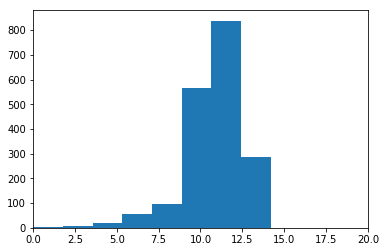

12.0      446
10.0      417
11.0      392
13.0      253
9.0       150
8.0        95
7.0        38
14.0       33
6.0        16
5.0        14
4.0         7
3.0         5
2.0         2
84.0        1
24.0        1
27.0        1
0.0         1
420.0       1
121.0       1
50.0        1
80.0        1
45.0        1
60.0        1
44.0        1
26.0        1
144.0       1
88.0        1
1.0         1
165.0       1
75.0        1
1776.0      1
99.0        1
204.0       1
Name: rating_numerator, dtype: int64

In [65]:
plt.hist(x = tweet_archive_clean.rating_numerator, bins = 1000)
plt.xlim(0,20)
plt.show()
tweet_archive_clean.rating_numerator.value_counts()

It looks like the highest frequency of ratings are from 7 to 14. The standard deviation isn't the most helpful here, because this rating system isn't the most accurate and precise. (Plus they're good dogs!)

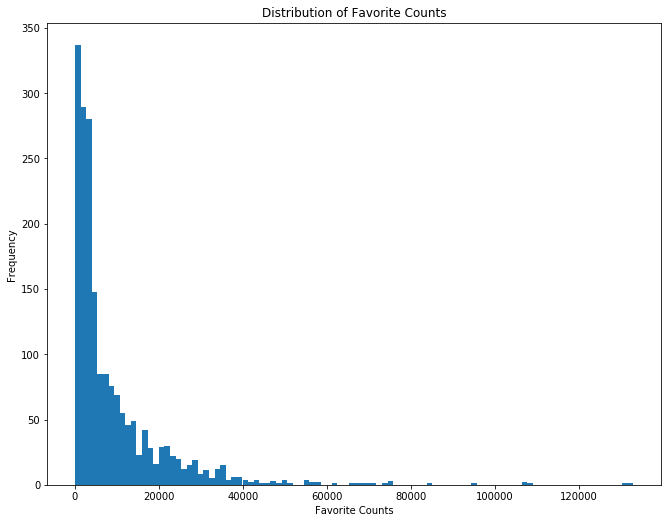

In [66]:
plt.figure(1, figsize = (11, 8.5))
plt.hist(x = tweet_archive_clean.favorite_count, bins = 100)
plt.title('Distribution of Favorite Counts')
plt.xlabel('Favorite Counts')
plt.ylabel('Frequency')
plt.show()

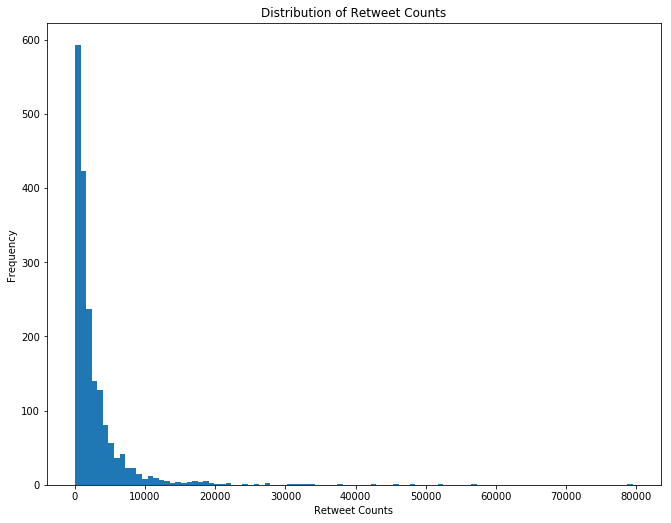

In [67]:
plt.figure(1, figsize = (11, 8.5))
plt.hist(x = tweet_archive_clean.retweet_count, bins = 100)
plt.title('Distribution of Retweet Counts')
plt.xlabel('Retweet Counts')
plt.ylabel('Frequency')
plt.show()

The distribution of retweet_count and favorite_count look similar, but retweet_count is lower than favorite_count. I would guess that these numbers are related to timestamp. Tweets that were tweeted after the account went viral, and verified on twitter, would have higher retweet_counts and favorite_counts. Looking at a log transformation of the data...

In [68]:
to_log = ['favorite_count', 'retweet_count']
df_logged = tweet_archive_clean[to_log].applymap(lambda x: np.log10(x))

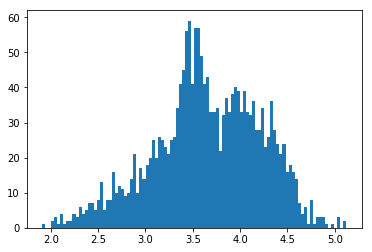

In [69]:
plt.hist(x = df_logged.favorite_count, bins = 100)
plt.show()

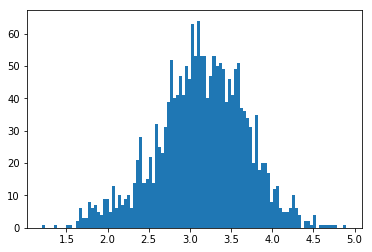

In [70]:
plt.hist(x = df_logged.retweet_count, bins = 100)
plt.show()

The log transformation of retweet_Count and favorite count makes them appear more normal. 
Favorite_count could be considered bimodal here.

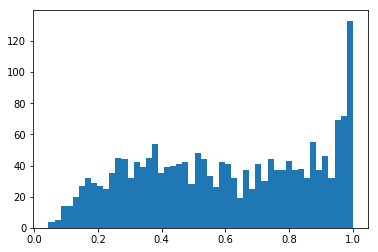

In [71]:
plt.hist(x = tweet_archive_clean.p1_conf, bins = 50)
plt.show()

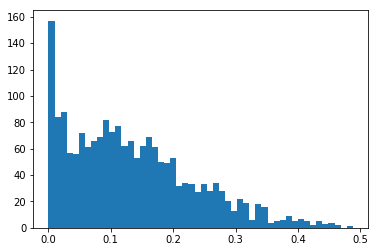

In [72]:
plt.hist(x = tweet_archive_clean.p2_conf, bins = 50)
plt.show()

Ok, this looks unsurprising. We won't look at p3_conf, because it is likely to be very small. It looks like there is a higher frequency of p1_conf values that are close to 1.0, but an even greater frequncy of p2_conf values that are closer to 0.0. This makes sense, it is likely that these high frequency values for p1_conf and p2_conf are from the same tweets.

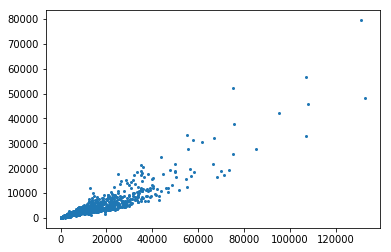

In [73]:
plt.plot(tweet_archive_clean.favorite_count, tweet_archive_clean.retweet_count, marker='o', linestyle='', ms=2 )
plt.show()

Favorite_count and Retweet_count are correlated pretty strongly. Let's replot the above plot with the logged and also do a correlation test.

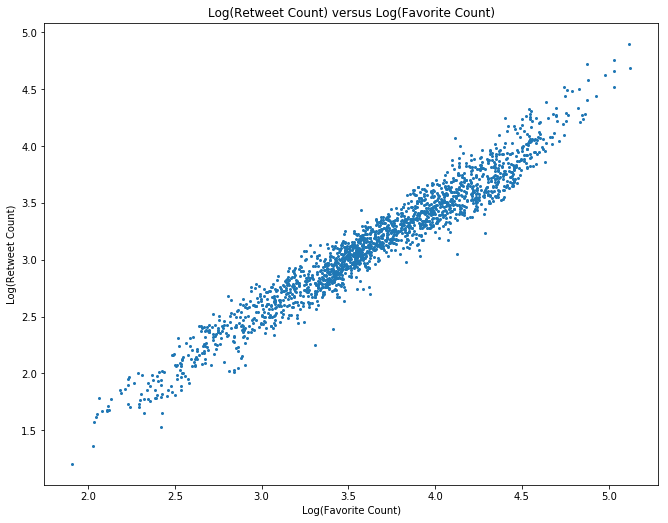

0.9702739014686549

In [74]:
plt.figure(1, figsize = (11, 8.5))
plt.plot(df_logged.favorite_count, df_logged.retweet_count, marker='o', linestyle='', ms=2 )
plt.title('Log(Retweet Count) versus Log(Favorite Count)')
plt.xlabel('Log(Favorite Count)')
plt.ylabel('Log(Retweet Count)')
plt.show()
np.corrcoef(df_logged.retweet_count, df_logged.favorite_count)[0][1]

Holy moly! Have you ever seen a correlation so beautiful? This isn't that surprising, anybody who has a twitter could tell you that favorites and retweets have a pretty strong direct relationship.

In [75]:
np.corrcoef(df_logged.retweet_count, df_logged.favorite_count)[0][1]

0.9702739014686549

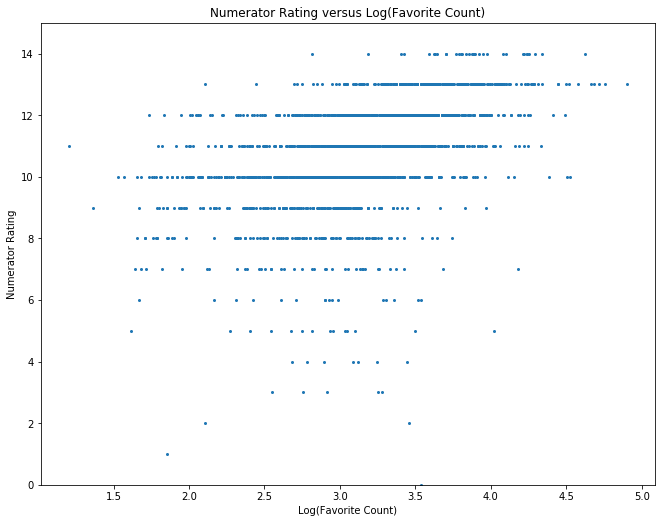

In [76]:
plt.figure(1, figsize = (11, 8.5))
plt.plot(df_logged.retweet_count, tweet_archive_clean.rating_numerator, marker ='o', linestyle='', ms= 2)
plt.title('Numerator Rating versus Log(Favorite Count)')
plt.xlabel('Log(Favorite Count)')
plt.ylabel('Numerator Rating')
plt.ylim(0,15)
plt.show()

Not a strong relationship but definitely some upward trend. Tweets with the most ratings tend to have higher retweets. The timestamp must have some play on this...

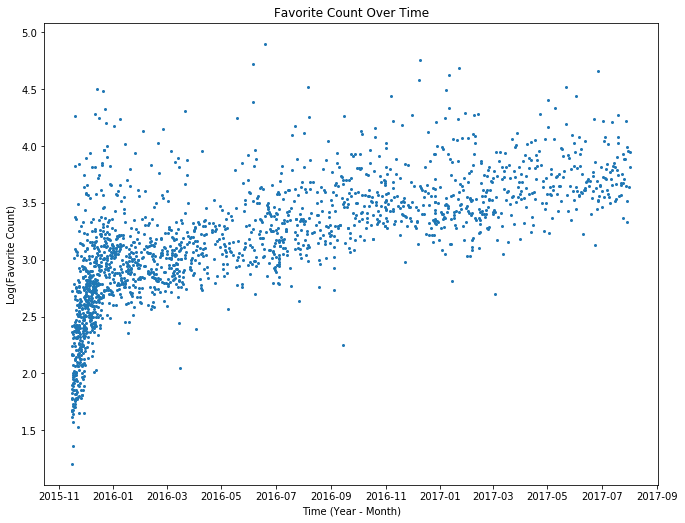

In [77]:
plt.figure(1, figsize = (11, 8.5))
plt.plot(tweet_archive_clean.timestamp ,df_logged.retweet_count, marker = 'o', linestyle = '', ms = 2)
plt.title('Favorite Count Over Time')
plt.xlabel('Time (Year - Month)')
plt.ylabel('Log(Favorite Count)')
plt.show()

Ok it looks like @dog_rates started to gain popularity very quickly upon first opening the account. With steady amounts of growth after. It looks like the account was tweeting a lot in the beginning but started to slow down once the hype cooled down.

In [78]:
tweet_archive_clean.year = pd.Series(list(range(len(tweet_archive_clean))))
tweet_archive_clean.month = pd.Series(list(range(len(tweet_archive_clean))))
for idx, row in tweet_archive_clean.iterrows():
    tweet_archive_clean.loc[idx,'year'] = row.timestamp.year
    tweet_archive_clean.loc[idx, 'month'] = row.timestamp.month

C:\Users\zas\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':
C:\Users\zas\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ipykernel import kernelapp as app


In [79]:
tweet_archive_clean.groupby(['month', 'year']).tweet_id.count()

month  year  
1.0    2016.0    157
       2017.0     66
2.0    2016.0    102
       2017.0     64
3.0    2016.0    113
       2017.0     47
4.0    2016.0     54
       2017.0     40
5.0    2016.0     55
       2017.0     42
6.0    2016.0     78
       2017.0     44
7.0    2016.0     87
       2017.0     49
8.0    2016.0     58
       2017.0      2
9.0    2016.0     63
10.0   2016.0     65
11.0   2015.0    264
       2016.0     52
12.0   2015.0    332
       2016.0     54
Name: tweet_id, dtype: int64

Judging from the above output, I would say that it is true. The later year always has a lower tweet count. This is more drastic for November and December months, because in November 2015 and December 2015 is when @dog_rates started out. Let's see if we can visualize this tweeting rate.

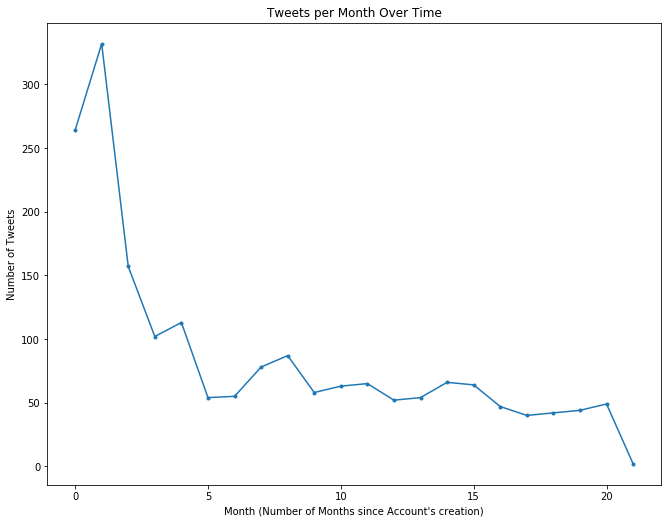

In [80]:
nmonth = list(range(22))
smonth = ['11/2015', '12/2015', '1/2016', '2/2016', '3/2016', '4/2016', ]
tweets_per_month=[264, 332, 157, 102, 113, 54, 55, 78, 87, 58, 63, 65, 52, 54, 66, 64, 47, 40, 42, 44, 49, 2]
plt.figure(1, figsize = (11, 8.5))
plt.plot(nmonth, tweets_per_month, marker= 'o', ms=3)
plt.title('Tweets per Month Over Time')
plt.xlabel('Month (Number of Months since Account\'s creation)')
plt.ylabel('Number of Tweets')
plt.show()

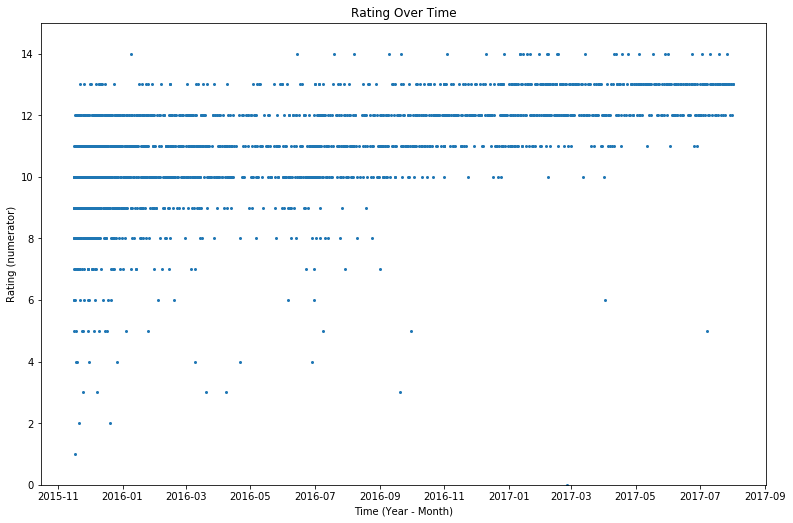

In [81]:
plt.figure(1, figsize = (13, 8.5))
plt.plot(tweet_archive_clean.timestamp, tweet_archive_clean.rating_numerator, marker='o', linestyle='', ms = 2)
plt.ylim(0,15)
plt.title('Rating Over Time')
plt.ylabel('Rating (numerator)')
plt.xlabel('Time (Year - Month)')
plt.show()

This is really interesting, it looks like as time went on @dog_rates stopped rating dogs under 10. The "they're good dogs Brent" meme/tweet was tweeted on September 12th 2016. We can see right around 09/2016 that the rating system shifted to almost exclusively ratings that are a 10 or higher.